In [46]:
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils import contours
from imutils.perspective import four_point_transform

In [47]:
img = cv2.imread("sudoku1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

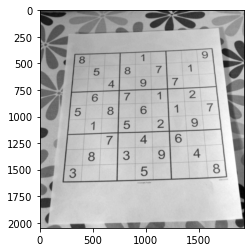

In [48]:
img_blurred = cv2.GaussianBlur(img , (7,7),3)

plt.imshow(img_blurred , cmap="gray")

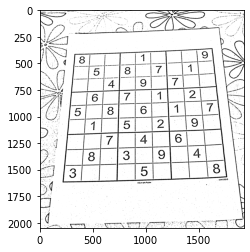

In [49]:
thresh= cv2.adaptiveThreshold(img_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C ,cv2.THRESH_BINARY, 11,2)

plt.imshow(thresh, cmap="gray")

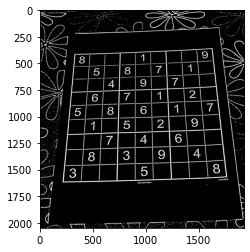

In [50]:
thresh= cv2.bitwise_not(thresh)

plt.imshow(thresh, cmap="gray")

In [51]:
contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#contours= contours[0]


In [52]:
contours = imutils.grab_contours(contours)
contours = sorted(contours , key = cv2.contourArea , reverse = True)

In [53]:
sudoku_contour= None

for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour , True)
    approx = cv2.approxPolyDP(contour , epsilon , True)
    
    if len(approx) == 4:
        sudoku_contour = approx
        break

if sudoku_contour is None :
    print("Not found") 

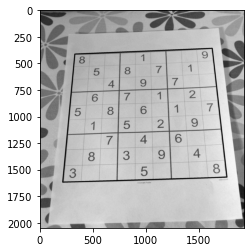

In [54]:
result = cv2.drawContours(img , [sudoku_contour] , -1 ,(0,255,0) , 8)
plt.imshow(result , cmap = "gray")

In [56]:
puzzle = four_point_transform(img, sudoku_contour.reshape(4,2))
warped = four_point_transform(gray_img, sudoku_contour.reshape(4,2))
plt.imshow(puzzle, cmap = "gray")

NameError: name 'gray_img' is not defined